In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print("Downloading and extracting assests....", end="")
    urlretrieve(url, save_path)
    try:
        with ZipFile(save_path) as z:
            z.extractall(os.path.split(save_path)[0])
        print("Done")
    except Exception as e:
        print("\nInvalidFile.", e)

In [3]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd(), f"assets/opencv_bootcamp_assets_NB1.zip")
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [4]:
Image(filename="assets/checkerboard_18x18.png")

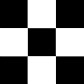

In [5]:
Image(filename="assets/checkerboard_84x84.jpg")

In [6]:
img = cv.imread("assets/checkerboard_18x18.png", cv.IMREAD_GRAYSCALE)
print(img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [7]:
print(f"Image Size: {img.shape}, Data Type: {img.dtype}")

Image Size: (18, 18), Data Type: uint8


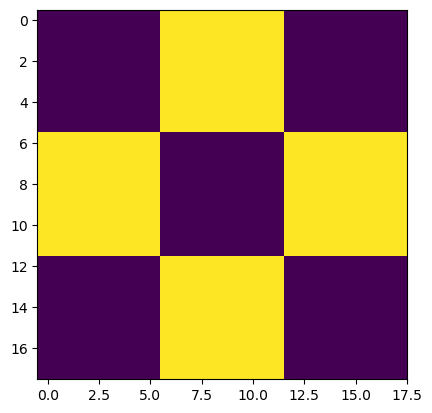

In [8]:
plt.imshow(img)

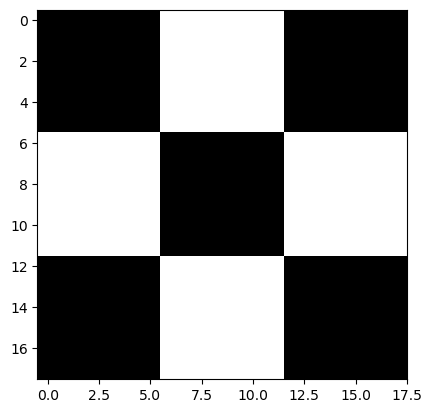

In [9]:
plt.imshow(img, cmap='gray')

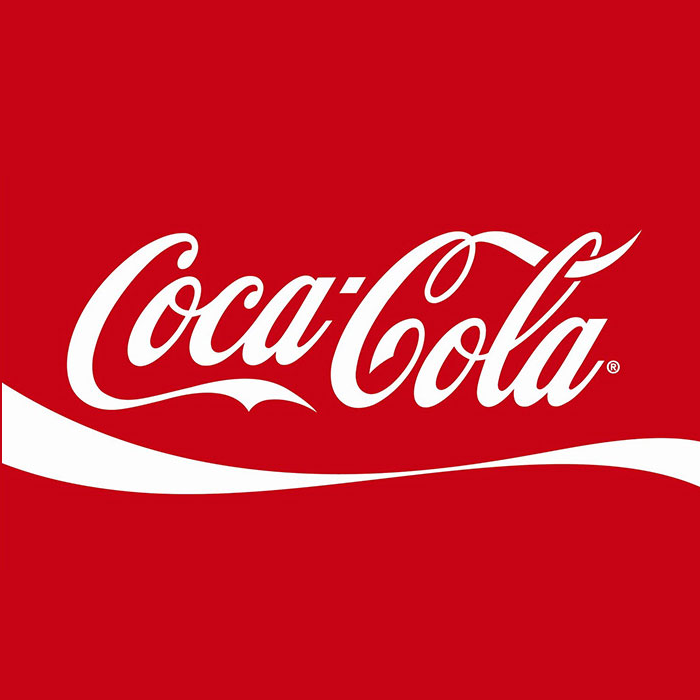

In [10]:
Image("assets/coca-cola-logo.png")

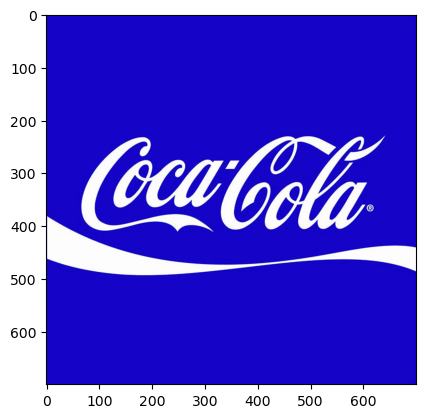

In [11]:
img_bgr = cv.imread("assets/coca-cola-logo.png", cv.IMREAD_COLOR)
plt.imshow(img_bgr)

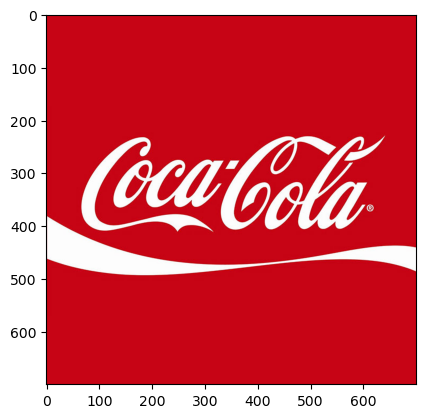

In [12]:
img_rgb = img_bgr[:,:,::-1]
plt.imshow(img_rgb)

Text(0.5, 1.0, 'Merged image')

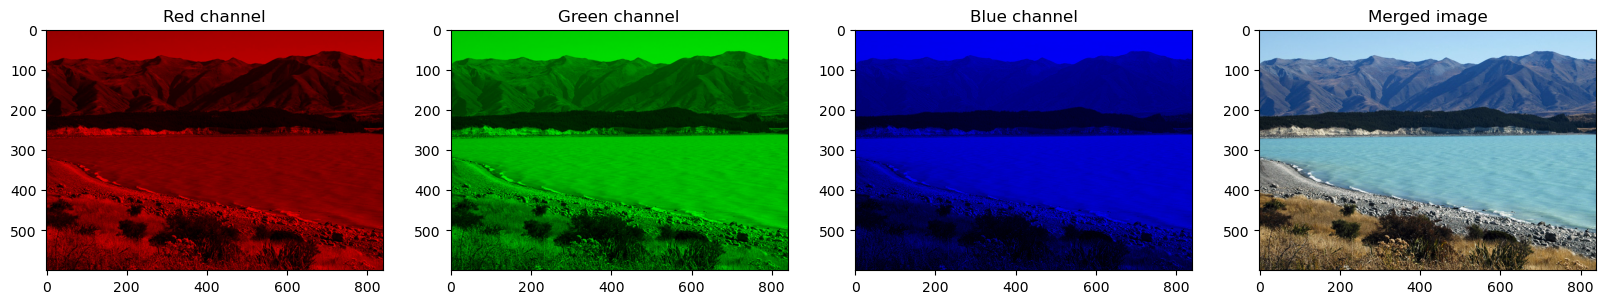

In [13]:
img = cv.imread("assets/New_Zealand_Lake.jpg")
b, g, r = cv.split(img)
size = r.shape
zero = np.zeros(r.shape, dtype=r.dtype)
red = cv.merge((r, zero, zero))

plt.figure(figsize=[20,5])
plt.subplot(1, 4, 1)
plt.imshow(cv.merge((r, zero, zero)))
plt.title("Red channel")
plt.subplot(1, 4, 2)
plt.imshow(cv.merge((zero, g, zero)))
plt.title("Green channel")
plt.subplot(1, 4, 3)
plt.imshow(cv.merge((zero, zero, b)))
plt.title("Blue channel")

img = cv.merge((b,g,r))
plt.subplot(1, 4, 4)
plt.imshow(img[:,:,::-1])
plt.title("Merged image")

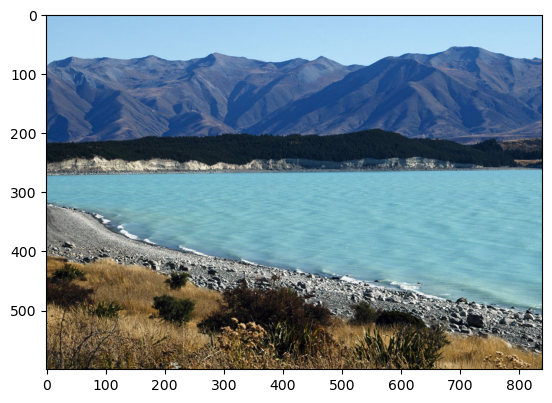

In [15]:
img_bgr = cv.imread("assets/New_Zealand_Lake.jpg")
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Text(0.5, 1.0, 'Original')

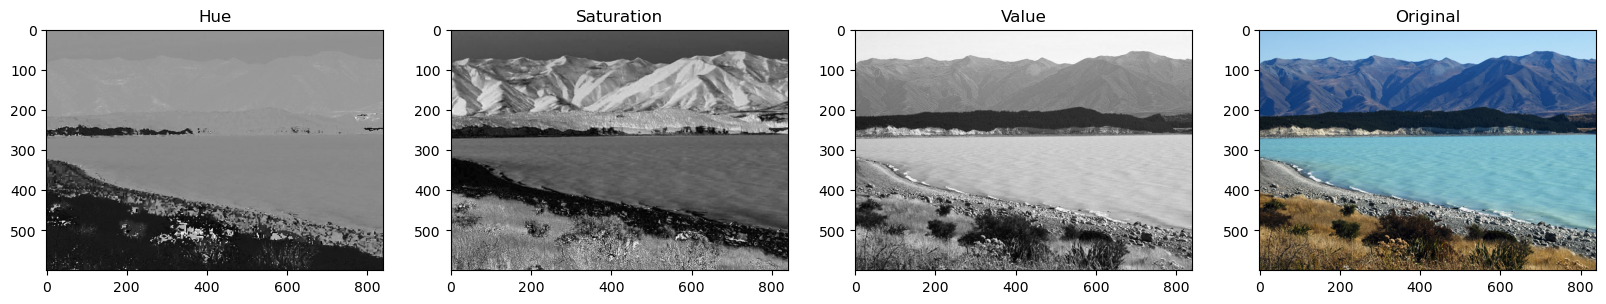

In [32]:
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)
# Hue: the color
# Saturation: how "strong" the color is
# Value: the brightness of the color

plt.figure(figsize=[20, 5])
plt.subplot(1, 4, 1)
plt.imshow(h, cmap='gray')
plt.title("Hue")
plt.subplot(1, 4, 2)
plt.imshow(s, cmap='gray')
plt.title("Saturation")
plt.subplot(1, 4, 3)
plt.imshow(v, cmap='gray')
plt.title("Value")
plt.subplot(1, 4, 4)
plt.imshow(img_rgb)
plt.title("Original")

Text(0.5, 1.0, 'Modified V')

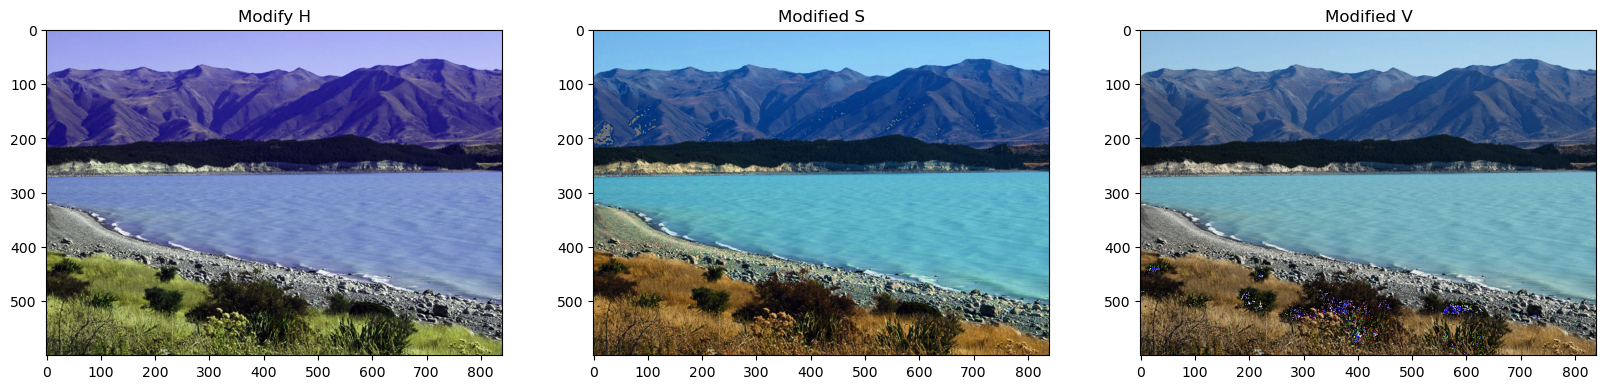

In [36]:
h_shift = 15
s_shift = 40
v_shift = 10

img_h = cv.merge((h + h_shift, s, v))
img_s = cv.merge((h, s + s_shift, v))
img_v = cv.merge((h, s, v - v_shift))

plt.figure(figsize=[20, 5])
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img_h, cv.COLOR_HSV2RGB), cmap='gray')
plt.title("Modify H")
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(img_s, cv.COLOR_HSV2RGB), cmap='gray')
plt.title("Modified S")
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(img_v, cv.COLOR_HSV2RGB), cmap='gray')
plt.title("Modified V")

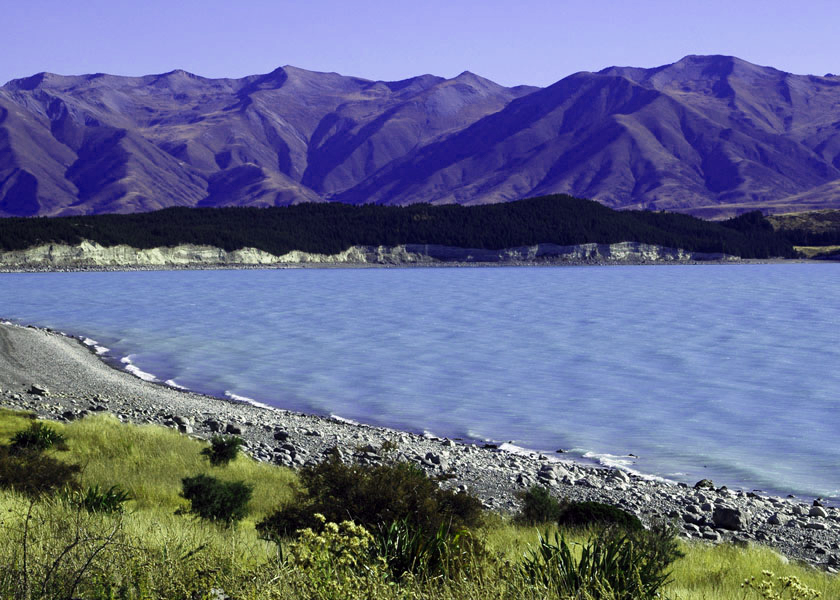

In [38]:
cv.imwrite("assets/new_zeland_change_hue.png", cv.cvtColor(img_h, cv.COLOR_HSV2BGR))
Image(filename="assets/new_zeland_change_hue.png")

Text(0.5, 1.0, 'Color')

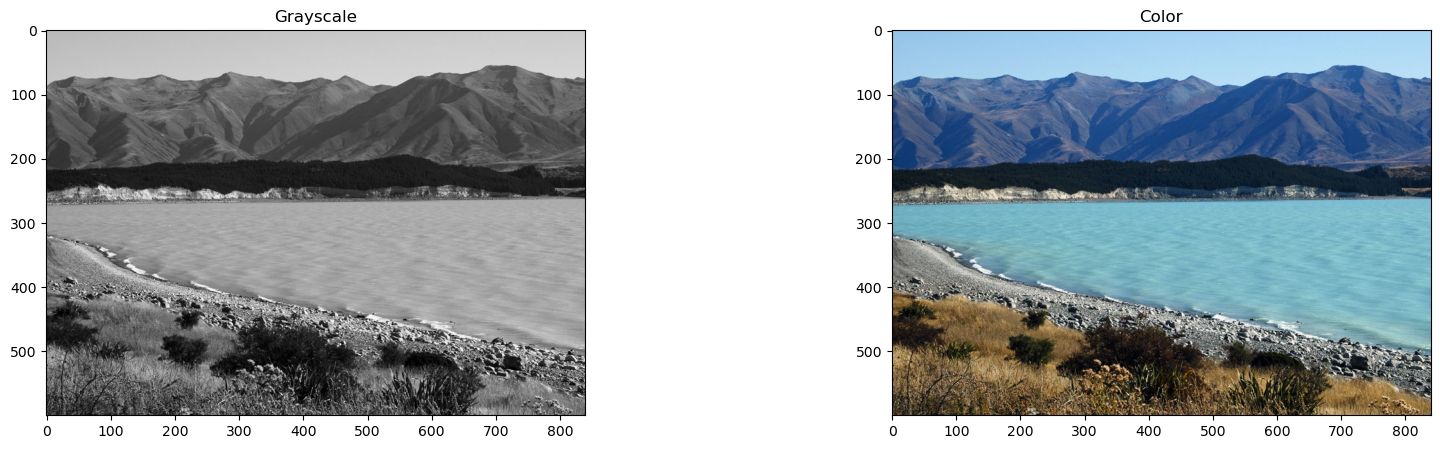

In [39]:
img_gray = cv.imread("assets/New_Zealand_Lake.jpg", cv.IMREAD_GRAYSCALE)
img_color = cv.imread("assets/New_Zealand_Lake.jpg", cv.IMREAD_COLOR)

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale')
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
plt.title('Color')

In [40]:
cv.imwrite("assets/new_zeland_change_hue.png", cv.cvtColor(img_h, cv.COLOR_HSV2BGR))

True

In [44]:
img = cv.imread("assets/checkerboard_84x84.jpg", 0)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

error: OpenCV(4.11.0) /usr/src/debug/opencv/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


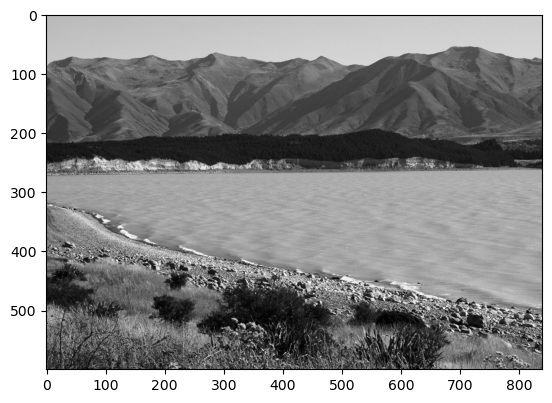

In [45]:
plt.imshow(img_gray, cmap='gray')